# Kaggle Titanic
[데이터 다운로드](https://www.kaggle.com/competitions/titanic/data)


코드 부분은 지우고 결과 부분만 남겨 뒀습니다.  
남아있는 결과와 동일하게 출력될 수 있도록 코드를 작성해보세요!  

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### Data Load

In [2]:
train = pd.read_csv("./train.csv", encoding="utf-8")
train.shape

(891, 12)

### 기본 정보

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 확인

<AxesSubplot:>

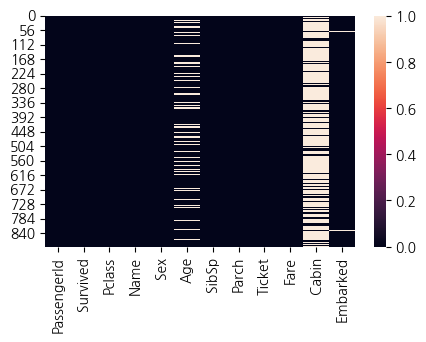

In [4]:
plt.figure(figsize=(5,3))
sns.heatmap(train.isnull() )

In [5]:
# Age, Cabin, Embarked 의 결측값 비율

train[['Age','Cabin','Embarked']].isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

### 생존자

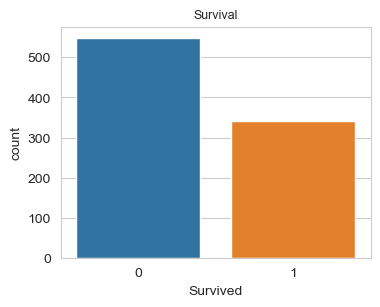

In [6]:
plt.figure(figsize=(4,3))
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived')
plt.title('Survival', fontsize=9);

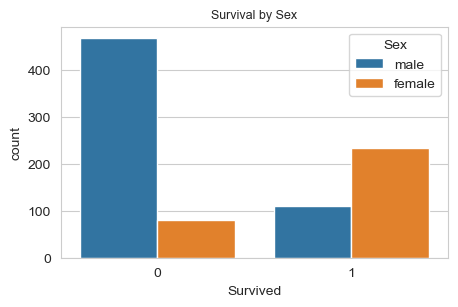

In [7]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Survival by Sex', fontsize=9);

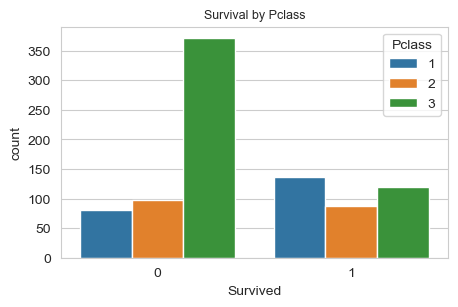

In [8]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Pclass')
plt.title('Survival by Pclass', fontsize=9);

### Data Cleaning
#### Age

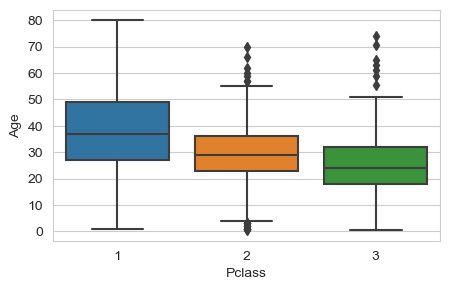

In [9]:
plt.figure(figsize=(5,3))
sns.boxplot(data=train, x='Pclass', y='Age')
plt.yticks(np.arange(0,90,10)); # y축 눈금 간격을 10마다

In [10]:
train.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


결측치가 있는 `Age`를 `Pclass`의 평균 나이값을 이용해 대채

In [11]:
# transform은 groupby 계산 후 원래의 df size로 되돌려주는 기능을 한다

def age_pclass(col1, col2):
    train[col1].fillna(train.groupby(col2)[col1].transform('mean'), inplace=True)
    return train.groupby(col2)[col1].describe()
    

In [12]:
# age_pclass 함수를 이용해 Age 결측치 채우기
age_pclass('Age','Pclass')

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,38.233441,13.731315,0.92,29.00,38.233441,47.25,80.0
2,184.0,29.877630,13.573758,0.67,23.00,29.877630,36.00,70.0
3,491.0,25.140620,10.620713,0.42,20.25,25.140620,29.00,74.0


#### 범주형 데이터 변환

범주형 데이터는 학습에서 바로 사용이 불가능하기 때문에 수치형으로 변환이 필요합니다.  
예를 들어, `Sex`의 경우 `Male=0`, `Female=1`과 같이 변환을 합니다.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


현재 범주형 데이터는, `Name, Sex, Ticket, Embarked`가 있음

#### pd.get_dummies
학습 이전에 모든 데이터를 수치로 변환해주는 전처리 작업이 필요함  
1. 수치형 데이터로 변환
2. 수치화된 데이터를 가변수화

##### Note!!! - 가변수화
수치형 데이터로만 변환하면, **서로 간의 관계성**이 생기게 되어버림
- 월, 화, 수 ... -> 1, 2, 3 ...
- 1+2=3 / 월+화=수라는 관계성이 성립해버림

`pandas`의 `get_dummies` 함수는 원핫인코딩을 이용하는 방식  
`get_dummies(data=, prefix=, prefix_sep=, dummy_na=, columns=, drop_first=, dtype=)` 형식으로 존재함
- data: one-hot encoding을 적용할 데이터
- prefix: 생성할 더미 데이터(가변수화된 데이터)의 컬럼 prefix
- prefix_sep: `default='_'`
- dummpy_na: `NaN`도 포함시킬지, `default=False`
- columns: 대상 컬럼
- drop_first: k개의 범주를 k-1개로 가변수화할 경우 사용
- dtype: 새로운 columns의 데이터 타입

In [14]:
# 범주형 데이터 보기

train[['Sex','Embarked']].value_counts()

Sex     Embarked
male    S           441
female  S           203
male    C            95
female  C            73
male    Q            41
female  Q            36
dtype: int64

In [15]:
# 수치형 볌주로 변환하지 않을 컬럼 삭제

train = train.drop(columns=['Name','Ticket','Cabin'])

In [16]:
# 결측값 포함, 대상 컬럼 지정, k-1개로 가변수화, dtype=int로 설정

train_dum = pd.get_dummies(train, dummy_na=True, columns = ['Sex','Embarked'], drop_first=True, dtype='int')

In [24]:
# 불필요한 가변수 삭제, 컬럼명 rename

train_dum = train_dum.drop(['Sex_nan','Embarked_nan'], axis=1).rename(columns = {'Sex_male':'male','Embarked_Q':'Q','Embarked_S':'S'})

In [25]:
train_dum.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
